### Group project:

#### Market segmentation by logistic regression
You are the members of the analytic department in the head office of a large car dealership chain. The marketing department needs to understand which potential clients in their database tend to buy a car and which just come to window-shop.
Below are the suggested specific steps of analysis for those who like the detailed instructions. However, these steps may be changed by those who prefer free creativity.

#### Part 1. Data preparation and visualization
- 1.1. Read the dataset
- 1.2. Delete all the rows containing the missing data. Imputation is not necessary.
- 1.3. Encode the data where necessary.
- 1.4. Visualize the columns and their pairs.
- 1.5. Produce the correlation matrix to make a first guess on usefulness of the predictors.

#### Part 2. Inference by logistic regression
- 2.1. You have 3 predictors (sex, age, income) and the target class variable purchase, taking the value 1 if he or she already bought a car once in the past. To predict this class for new potential customers, you need to learn the logistic regression model parameters.
- 2.2. Divide your client base into training and testing sets.
- 2.3. Fit the model on a training set.
- 2.4. Produce your estimated regression equation, interpret the coefficients and comment on the regression summary.
- 2.5. Try to reduce your model, dropping some predictors, and repeat the above steps with each reduced version.
- 2.6. Compare the fitting results for your models.

#### Part 3. Prediction
- 3.1. For each of the fitted models, predict the purchase class for the training set.
- 3.2. For each of the fitted models, predict the purchase class for the testing set.

#### Part 4. Evaluation of the prediction quality
- 4.1. Produce the confusion matrix and the classification report for each of the predictions.
- 4.2. Compare the results between the different models and also training versus testing sets.

#### Part 5. Reporting
- 5.1. Compose a business report of about 10 pages length, following the approximate structure:
- 5.1.1. Title page, listing the group members, project title, school, course, submission date.
- 5.1.2. Executive summary, containing your view of the problem setting, brief description of the intended analysis and all that usually pertains to this section
- 5.1.3. Analysis section
- 5.1.4. Conclusion
- 5.1.5. References (on sources used and on the Python code on GIT or Colab)
- 5.1.6. Attachment, including the Python code and other auxiliary materials
- 5.2. Submit the report on canvas.

In [1]:
# Import necessary Python Libraries:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 1.1 Read dataset:
df = pd.read_csv('../input/assignment-ds1/dataset_assignment.csv')

In [3]:
df.head()

,Identifier,sex,age,income,purchase
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0


In [4]:
# Lets look at the overall size/shape of the dataset:
print(df.shape)
print()
print()
print(df.info())

(502, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Identifier  502 non-null    int64  
 1   sex         502 non-null    object 
 2   age         481 non-null    float64
 3   income      476 non-null    float64
 4   purchase    482 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB
None


In [5]:
percent_missing = df.isnull().sum()/len(df)
percent_missing

Identifier    0.000000
sex           0.000000
age           0.041833
income        0.051793
purchase      0.039841
dtype: float64

Identifier and sex have no null values. 

Age and purchase have less than 5% null

Income is 5.2% null. 

In [6]:
# given that the length of the dataframe is only 502 datapoints, simply getting rid of null values would result in a
# lot of data lost 
print("df length:", len(df))
print("5% of df length:", 0.05*len(df))

df length: 502
5% of df length: 25.1


In [7]:
# However given the guidance "1.2. Delete all the rows containing the missing data. Imputation is not necessary."

df.dropna(inplace=True)

In [8]:
percent_missing = df.isnull().sum()/len(df)
percent_missing

Identifier    0.0
sex           0.0
age           0.0
income        0.0
purchase      0.0
dtype: float64

In [9]:
df.head()

,Identifier,sex,age,income,purchase
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0


In [ ]:
# Look at the distribution of the dataset and quantiles: 
df.describe()

In [10]:
# Breakdown of classes is disproportionate so we may need to use upsampling or down sampling to get a more 
# accurate model: 
df['purchase'].value_counts()

0.0    271
1.0    167
Name: purchase, dtype: int64

Female    225
Male      213
Name: sex, dtype: int64


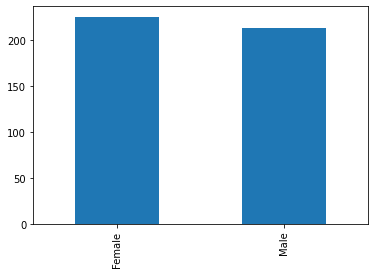

In [12]:
# Plot the frequencies of each category: 
df['sex'].value_counts().plot(kind='bar')

# Display numerical values: 
print(df['sex'].value_counts())

35.0    32
37.0    23
42.0    21
41.0    19
38.0    17
47.0    17
39.0    17
40.0    16
26.0    16
46.0    15
48.0    14
36.0    13
27.0    13
28.0    12
30.0    11
31.0    11
29.0    10
49.0    10
60.0    10
24.0     9
59.0     9
33.0     9
32.0     9
58.0     8
45.0     7
54.0     7
53.0     7
19.0     7
20.0     7
23.0     6
52.0     6
34.0     6
25.0     6
57.0     5
18.0     5
22.0     5
43.0     4
21.0     4
50.0     4
51.0     3
56.0     3
55.0     3
44.0     2
Name: age, dtype: int64


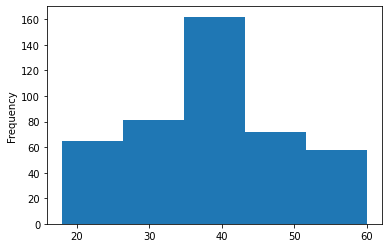

In [13]:
df['age'].plot(kind='hist', bins = 5)

print(df['age'].value_counts())

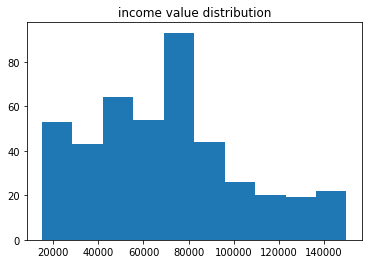

In [14]:
num_columns = ['income']

for col_name in num_columns:
    plt.figure()
    plt.hist(df[col_name])
    plt.title(col_name + ' value distribution')
    plt.show()

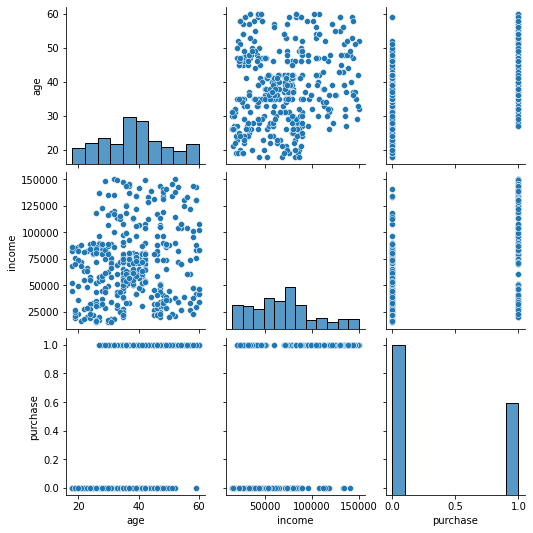

In [15]:
sns.pairplot(df[['sex', 'age', 'income', 'purchase']]);

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.corr()

,Identifier,age,income,purchase,sex_Male
Identifier,1.000000,-0.000357,0.062129,-0.007346,-0.043340
age,-0.000357,1.000000,0.127944,0.632383,-0.076477
income,0.062129,0.127944,1.000000,0.336978,-0.027163
purchase,-0.007346,0.632383,0.336978,1.000000,-0.030211
sex_Male,-0.043340,-0.076477,-0.027163,-0.030211,1.000000


In [18]:
X = df[['age', 'income', 'sex_Male']]
y = df['purchase']

In [19]:
# Bit of an unbalanced classification 
y.value_counts()

0.0    271
1.0    167
Name: purchase, dtype: int64

#### Part 2. Inference by logistic regression
- 2.1. You have 3 predictors (sex, age, income) and the target class variable purchase, taking the value 1 if he or she already bought a car once in the past. To predict this class for new potential customers, you need to learn the logistic regression model parameters.
- 2.2. Divide your client base into training and testing sets.
- 2.3. Fit the model on a training set.
- 2.4. Produce your estimated regression equation, interpret the coefficients and comment on the regression summary.
- 2.5. Try to reduce your model, dropping some predictors, and repeat the above steps with each reduced version.
- 2.6. Compare the fitting results for your models.


In [20]:
# Create different X groups, for the different models we will be running (This is required given that the train and test data need to have the same number of predictors)
X2 = X.drop(['sex_Male'], axis=1)
X3 = X.drop(['age'], axis=1)
X4 = X.drop(['income'], axis=1)
X5 = X.drop(['age', 'sex_Male'], axis=1)
X6 = X.drop(['income', 'sex_Male'], axis=1)
X7 = X.drop(['income', 'age'], axis=1)

In [21]:
# 2.1: 
#2.2: 
# May need smote, downsampling or upsampling, but first train and test splits:
from sklearn.model_selection import train_test_split
# random_state=10 selected to get replicability. Save as X_tr and y_tr because re-sampling still needs to occur:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)
X_tr2, X_test2, y_tr, y_test = train_test_split(X2, y, test_size = 0.25, random_state=5)
X_tr3, X_test3, y_tr, y_test = train_test_split(X3, y, test_size = 0.25, random_state=5) 
X_tr4, X_test4, y_tr, y_test = train_test_split(X4, y, test_size = 0.25, random_state=5) 
X_tr5, X_test5, y_tr, y_test = train_test_split(X5, y, test_size = 0.25, random_state=5) 
X_tr6, X_test6, y_tr, y_test = train_test_split(X6, y, test_size = 0.25, random_state=5) 
X_tr7, X_test7, y_tr, y_test = train_test_split(X7, y, test_size = 0.25, random_state=5) 


In [ ]:
# COULD DO THIS METHOD HOWEVER WE ARE NOT USING THIS METHOD FOR THIS PROJECT: 

from imblearn.over_sampling import SMOTE
# The main parameter we can set with SMOTE, is k_neighbors, which is the number of nearest neighbours used to 
# construct synthetic samples, for the purposes of this model, let's pick 2:
#Intiate SMOTE:
smote = SMOTE(k_neighbors=2, n_jobs = -1, random_state=1)
X_train_s, y_train = smote.fit_resample(X_tr,y_tr)

# Save X_smote as a df in order to pull out feature names:
X_train_s = pd.DataFrame(X_train_s, columns = X_tr.columns)

# Show how the smote works effectively as another way of oversampling:
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)
print()

In [ ]:
# Problem with the above method, because smote makes imaginary data points it works well for age and income but for the sex
# feature SMOTE does not work as it may select values between 1 and 0. Therefore a RandomOversampler makes the most 
# sense: 

In [22]:
from imblearn.over_sampling import RandomOverSampler

# Added random state to replicate results: 
ROS = RandomOverSampler(random_state=5)
X_train, y_train = ROS.fit_resample(X_tr, y_tr)
X_train2, y_train = ROS.fit_resample(X_tr2, y_tr)
X_train3, y_train = ROS.fit_resample(X_tr3, y_tr)
X_train4, y_train = ROS.fit_resample(X_tr4, y_tr)
X_train5, y_train = ROS.fit_resample(X_tr5, y_tr)
X_train6, y_train = ROS.fit_resample(X_tr6, y_tr)
X_train7, y_train = ROS.fit_resample(X_tr7, y_tr)

X_train = pd.DataFrame(X_train, columns = X_tr.columns)
X_train2 = pd.DataFrame(X_train2, columns = X_tr2.columns)
X_train3 = pd.DataFrame(X_train3, columns = X_tr3.columns)
X_train4 = pd.DataFrame(X_train4, columns = X_tr4.columns)
X_train5 = pd.DataFrame(X_train5, columns = X_tr5.columns)
X_train6 = pd.DataFrame(X_train6, columns = X_tr6.columns)
X_train7 = pd.DataFrame(X_train7, columns = X_tr7.columns)


# Show how the smote works effectively as another way of oversampling:
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)
print()

[[  0. 205.]
 [  1. 205.]]



In [24]:
# Note: only the optimal model (i.e. all predictors included has had the standard scaler fit to it, due to it being inefficient to scale all 7 sets)

from sklearn.preprocessing import StandardScaler
# First dataset: 
scaler = StandardScaler()
scaler = scaler.fit(X_train)

# transform X_train, however put X_train in to a df in order to easier pull out the coefficients:
scaled_features = scaler.transform(X_train.values)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

# transform X_test and X_validation as well:
X_test = scaler.transform(X_test.values)



In [26]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [27]:
# To get an idea of the regression equation we can use:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_sm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.329271
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      406
Method:                           MLE   Df Model:                            3
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.5250
Time:                        19:06:28   Log-Likelihood:                -135.00
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 2.232e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0362      0.153      0.237      0.813      -0.263       0.336
age            2.9962      0.

Using Stats models we will look at each model's summary report, given that sklearn.logisticregression does not have this functionality, to assess each model's score, sklearn will be used afterwards:

The different models are as follows:
- Model1 = normal model with all predictors
- Model2 = model with 'Sex' predictor dropped (model = Income + age)
- Model3 = model with 'age' dropped (model = Income + sex)
- Model4 = model with 'income' dropped (model = age + sex)
- Model5 = model with only 'income'
- Model6 = model with only 'age'
- Model7 = model with only "sex"


In [28]:
# The following is essentially stating again each of our models and the columns that need to be dropped for them (restating them because of the need for the 
# coefficient to be added for stats models Log reg)
X_train2_sm = X_train_sm.drop(['sex_Male'], axis=1)
logit_model2=sm.Logit(y_train,X_train2_sm)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.330549
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.5231
Time:                        19:09:23   Log-Likelihood:                -135.53
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 2.726e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0463      0.152      0.304      0.761      -0.252       0.344
age            2.9564      0.

In [29]:
# 2.5: 
X_train3_sm = X_train_sm.drop(['age'], axis=1)
logit_model3=sm.Logit(y_train,X_train3_sm)
result3=logit_model3.fit()
print(result3.summary())

# Without even checking the scores of this, we can see with a Pseudo R-square  of 0.07 that this model will probably not score well. 

Optimization terminated successfully.
         Current function value: 0.611300
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.1181
Time:                        19:09:26   Log-Likelihood:                -250.63
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 2.669e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.108      0.171      0.864      -0.192       0.229
income         0.8823      0.

In [30]:
# 2.5: 
X_train4_sm = X_train_sm.drop(['income'], axis=1)
logit_model4=sm.Logit(y_train,X_train4_sm)
result4=logit_model4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.438715
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.3671
Time:                        19:09:30   Log-Likelihood:                -179.87
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 4.962e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0433      0.131      0.330      0.742      -0.214       0.301
age            2.0697      0.

In [31]:
# X_train5_sm = model with only 'income':
X_train5_sm = X_train_sm.drop(['sex_Male', 'age'], axis=1)
logit_model5=sm.Logit(y_train, X_train5_sm)
result5=logit_model5.fit()
print(result5.summary())

Optimization terminated successfully.
         Current function value: 0.612188
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.1168
Time:                        19:09:33   Log-Likelihood:                -251.00
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 3.706e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.107      0.154      0.877      -0.194       0.227
income         0.8888      0.

In [32]:
# X_train6_sm = model with only 'age':
X_train6_sm = X_train_sm.drop(['sex_Male', 'income'], axis=1)
logit_model6=sm.Logit(y_train, X_train6_sm)
result6=logit_model6.fit()
print(result6.summary())

Optimization terminated successfully.
         Current function value: 0.438833
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.3669
Time:                        19:09:36   Log-Likelihood:                -179.92
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                 2.863e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0415      0.131      0.316      0.752      -0.216       0.299
age            2.0736      0.

In [33]:
# X_train7_sm = model with only "sex":
X_train7_sm = X_train_sm.drop(['income', 'age'], axis=1)
logit_model7=sm.Logit(y_train, X_train7_sm)
result7=logit_model7.fit()
print(result7.summary())

Optimization terminated successfully.
         Current function value: 0.690072
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  410
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                0.004437
Time:                        19:09:38   Log-Likelihood:                -282.93
converged:                       True   LL-Null:                       -284.19
Covariance Type:            nonrobust   LLR p-value:                    0.1123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.023e-05      0.099     -0.001      1.000      -0.194       0.194
sex_Male      -0.1571      0.

In [41]:
from sklearn.linear_model import LogisticRegression
myLog1 = LogisticRegression()
myLog1.fit(X_train, y_train)

myLog2 = LogisticRegression()
myLog2.fit(X_train2,y_train)

myLog3 = LogisticRegression()
myLog3.fit(X_train3, y_train)

myLog4 = LogisticRegression()
myLog4.fit(X_train4, y_train)

myLog5 = LogisticRegression()
myLog5.fit(X_train5, y_train)

myLog6 = LogisticRegression()
myLog6.fit(X_train6, y_train)

myLog7 = LogisticRegression()
myLog7.fit(X_train7, y_train)

print("Model with all predictors: ", myLog1.score(X_train,y_train))
print("Model without Sex: ", myLog2.score(X_train2,y_train))
print("Model without Age: ", myLog3.score(X_train3, y_train))
print("Model without income: ", myLog4.score(X_train4, y_train))
print("Model with Only income: ", myLog5.score(X_train5, y_train))
print("Model with only Age : ", myLog6.score(X_train6, y_train))
print("Model with only Sex: ", myLog7.score(X_train7, y_train))

Model with all predictors:  0.8585365853658536
Model without Sex:  0.8536585365853658
Model without Age:  0.5
Model without income:  0.7731707317073171
Model with Only income:  0.5
Model with only Age :  0.7634146341463415
Model with only Sex:  0.5390243902439025


With the above, it makes sense to build the model going forward without sex included as it is clearly not significant (both in terms of p-value as well as to the actual score/accuracy to the model). Therefore moving forward the X_train set will include only the income and age predictors. 

From the above, we the optimal regularization parameter is at a point where Test accuracies are still below Train Accuracies, any point after that and we run into potential problems of overfitness as lower C-values typically leads to lower accuracy scores but less of a risk of overfitting. Due to this dataset being quite short, overfitting could be a potential risk (as our X_train that our data is training on, is only 410 rows long; less data points = each data point is more meaningful as interpreted by the model). Therefore makes sense to use a conservative C-value for the regularization of 10**-2 or 0.01.

Although we could try dropping other features and keeping sex in the model, but given the other two features (age and income) have p-values that are essentially zero. So it probably doesnt make sense to try models with fewer features. 

In [47]:
# Model 1:
y_pred_train1 = myLog1.predict(X_train)
y_pred = myLog1.predict(X_test)

In [42]:
# Model 2:
y_pred_train2 = myLog2.predict(X_train2)
y_pred2 = myLog2.predict(X_test2)
# Model 3: 
y_pred_train3 = myLog3.predict(X_train3)
y_pred3 = myLog3.predict(X_test3)
# Model 4: 
y_pred_train4 = myLog4.predict(X_train4)
y_pred4 = myLog4.predict(X_test4)
# Model 5: 
y_pred_train5 = myLog5.predict(X_train5)
y_pred5 = myLog5.predict(X_test5)
# Model 6: 
y_pred_train6 = myLog6.predict(X_train6)
y_pred6 = myLog6.predict(X_test6)
#Model 7: 
y_pred_train7 = myLog7.predict(X_train7)
y_pred7 = myLog7.predict(X_test7)

In [ ]:
y_pred_train

In [ ]:
y_pred_test

From the above, we the optimal regularization parameter is at a point where Test accuracies are still below Train Accuracies, any point after that and we run into potential problems of overfitness as lower C-values typically leads to lower accuracy scores but less of a risk of overfitting. Due to this dataset being quite short, overfitting could be a potential risk (as our X_train that our data is training on, is only 410 rows long; less data points = each data point is more meaningful as interpreted by the model). Therefore makes sense to use a conservative C-value for the regularization of 10**-2 or 0.01.

- Model1 = normal model with all predictors
- Model2 = model with 'Sex' predictor dropped (model = Income + age)
- Model3 = model with 'age' dropped (model = Income + sex)
- Model4 = model with 'income' dropped (model = age + sex)
- Model5 = model with only 'income'
- Model6 = model with only 'age'
- Model7 = model with only "sex"

In [49]:
from sklearn.metrics import confusion_matrix
print("Model 1: All Predictors")
print(confusion_matrix(y_test, y_pred))
print("Model 2: Income + Age")
print(confusion_matrix(y_test, y_pred2))
print("Model 3: Income + Sex")
print(confusion_matrix(y_test, y_pred3))
print("Model 4: Age + Sex")
print(confusion_matrix(y_test, y_pred4))
print("Model 5: Income")
print(confusion_matrix(y_test, y_pred5))
print("Model 6: Age")
print(confusion_matrix(y_test, y_pred6))
print("Model 7: Sex")
print(confusion_matrix(y_test, y_pred7))

Model 1: All Predictors
[[57  9]
 [ 5 39]]
Model 2: Income + Age
[[56 10]
 [ 6 38]]
Model 3: Income + Sex
[[ 0 66]
 [ 0 44]]
Model 4: Age + Sex
[[53 13]
 [13 31]]
Model 5: Income
[[ 0 66]
 [ 0 44]]
Model 6: Age
[[50 16]
 [12 32]]
Model 7: Sex
[[34 32]
 [24 20]]


The Best Model (All Predictors):

|     |  Predicted 0  |   Predicted 1 | True Totals |
| --------- |:---:|:---:|:---:|
|True 0|57 | 9 | 66 |
|True 1|5|39 | 44 |
|Predicted Totals| 62 | 48 | 110 |

In [51]:
from sklearn.metrics import classification_report
print("Model 1: All Predictors")
print(classification_report(y_test, y_pred))
print("Model 2")
print(classification_report(y_test, y_pred2))
print("Model 3")
print(classification_report(y_test, y_pred3))
print("Model 4")
print(classification_report(y_test, y_pred4))
print("Model 5")
print(classification_report(y_test, y_pred5))
print("Model 6")
print(classification_report(y_test, y_pred6))
print("Model 7")
print(classification_report(y_test, y_pred7))

Model 1: All Predictors
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        66
         1.0       0.81      0.89      0.85        44

    accuracy                           0.87       110
   macro avg       0.87      0.88      0.87       110
weighted avg       0.88      0.87      0.87       110

Model 2
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        66
         1.0       0.79      0.86      0.83        44

    accuracy                           0.85       110
   macro avg       0.85      0.86      0.85       110
weighted avg       0.86      0.85      0.86       110

Model 3
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        66
         1.0       0.40      1.00      0.57        44

    accuracy                           0.40       110
   macro avg       0.20      0.50      0.29       110
weighted avg       0.16      0.40 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


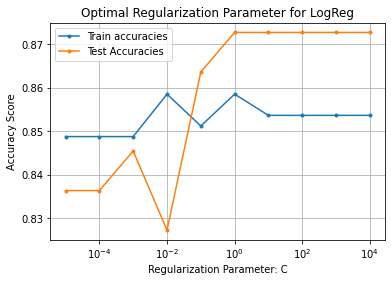

In [53]:
# Given that we now have the optimal model decided:
# fit the model and optimize C parameter:
# Now let's find the optimal C value for our logistic regression model:
C_range = np.array([0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000, 10000])
test_scores=[]
train_scores=[]
# For loop going through different possible regularization parameters. The lower the value the more regularization,
# given that C is the inverse of regularization. 
for c in C_range:
    # Instantiate and fit a Logistic Regression model to the data. Solver set to 'lbfgs'. n_jobs=-1 in order to 
    # improve processing speeds. 
    myLog= LogisticRegression(C=c, solver='lbfgs', n_jobs=-1, random_state=1)
    myLog.fit(X_train,y_train)
    
    # append results to score lists for plotting: 
    train_scores.append(myLog.score(X_train,y_train))
    test_scores.append(myLog.score(X_test,y_test))

    
plt.figure()
plt.plot(C_range, train_scores, label='Train accuracies', marker='.')
plt.plot(C_range, test_scores, label="Test Accuracies",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Accuracy Score')
plt.title('Optimal Regularization Parameter for LogReg')
plt.grid()
plt.show();

In [55]:
# Based off ML/Data Science, the optimal model (with all 3 features and a C parameter of 10^-2)
myLogFinal = LogisticRegression(C=0.01)
myLogFinal.fit(X_train,y_train) 

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
y_pred = myLogFinal.predict(X_test)

print("Scores: ")
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))


Scores: 
Accuracy score:  0.8272727272727273
Recall score:  0.7954545454545454
Precision Score:  0.7777777777777778


In [57]:
from sklearn.model_selection import cross_val_score
myLogcvFinal = LogisticRegression(C=0.01, solver='lbfgs', random_state=1)
cv_score = np.mean(cross_val_score(myLogcvFinal, X_train, y_train, cv=5))
cv_score

0.8317073170731707

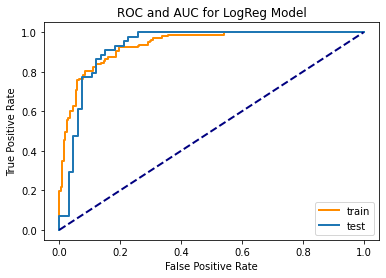

Test AUC score: 0.9273415977961433
Train AUC score: 0.9362046400951815


In [58]:
y_proba = myLog.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

#Get the probability for each point in the train set.
y_proba_train = myLog.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)
  
# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC for LogReg Model')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")